<a href="https://colab.research.google.com/github/zahra-jazini/data-structures-python/blob/main/Binary_Min_Heap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

این پروژه یک شبیه‌ساز ساده برای Binary Min Heap است که به کمک کتابخانه heapq در پایتون پیاده‌سازی شده. این نوع داده در الگوریتم‌هایی مثل Dijkstra یا سیستم‌های صف اولویت (Priority Queue) کاربرد دارد. در این شبیه‌ساز، مقادیر به صورت پویایی وارد Heap می‌شوند و عملیات extract_min کمترین مقدار را حذف کرده و ساختار را به‌روزرسانی می‌کند.
خروجی‌ها شامل وضعیت Heap قبل و بعد از حذف عنصر کمینه هستند.

In [ ]:
import heapq

class BinaryMinHeap:
    def __init__(self):
        self.heap = []

    def insert(self, item):
        heapq.heappush(self.heap, item)

    def extract_min(self):
        if not self.heap:
            return None
        return heapq.heappop(self.heap)

    def get_min(self):
        if not self.heap:
            return None
        return self.heap[0]

    def __str__(self):
        return str(self.heap)

# استفاده نمایشی از کلاس:
heap = BinaryMinHeap()
for value in [20, 5, 15, 22, 9]:
    heap.insert(value)

print("🔹 وضعیت اولیه Heap:", heap)
min_val = heap.extract_min()
print("✅ کمترین مقدار حذف‌شده:", min_val)
print("🔹 وضعیت بعد از حذف:", heap)


🔹 وضعیت اولیه Heap: [5, 9, 15, 22, 20]
✅ کمترین مقدار حذف‌شده: 5
🔹 وضعیت بعد از حذف: [9, 20, 15, 22]


پروژه دوم: ✅ Hash Table with Collision Handling (بررسی برخوردها)



در این پروژه، یک Hash Table ساده با مدیریت برخورد به روش Chaining (زنجیره‌ای) پیاده‌سازی شده است. برای درک بهتر مفهوم Collision (برخورد)، چند مقدار را طوری وارد می‌کنیم که هش آنها یکی شود و برخورد ایجاد شود. سپس مقدارها را در Bucket‌های مرتبط ذخیره کرده و خروجی بصری آن‌ها را به صورت گرافیکی رسم می‌کنیم.
این پروژه برای درک دقیق ساختار داده Hash Table، تابع هش و استراتژی‌های مدیریت برخورد بسیار مناسب است.

0: [('Ala', 90)]
1: [('Lila', 12)]
2: [('Zahra', 45)]
3: [('Ali', 20)]
4: [('Elahe', 33)]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


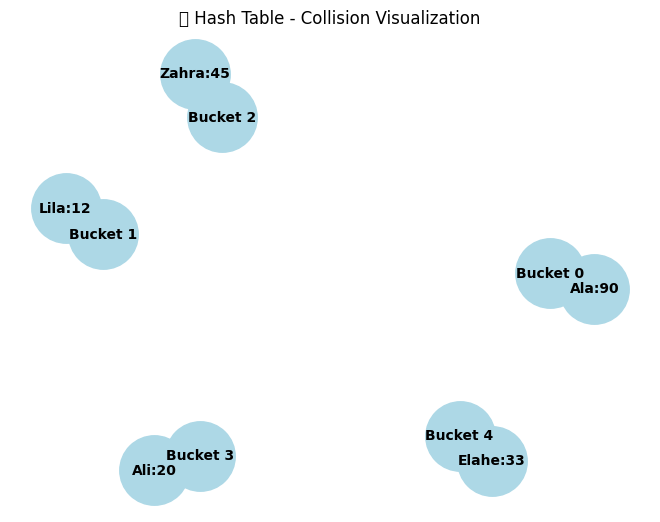

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from random import randint

class HashTable:
    def __init__(self, size):
        self.size = size
        self.buckets = [[] for _ in range(size)]

    def _hash(self, key):
        # تابع هش ساده: مجموع کدهای ASCII
        return sum(ord(c) for c in str(key)) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        self.buckets[index].append((key, value))

    def display(self):
        for i, bucket in enumerate(self.buckets):
            print(f"{i}: {bucket}")

    def visualize(self):
        G = nx.DiGraph()
        for i, bucket in enumerate(self.buckets):
            G.add_node(f"Bucket {i}")
            for j, (k, v) in enumerate(bucket):
                node_label = f"{k}:{v}"
                G.add_node(node_label)
                G.add_edge(f"Bucket {i}", node_label)

        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10, font_weight='bold', edge_color='gray')
        plt.title("🔗 Hash Table - Collision Visualization")
        plt.show()

# استفاده از جدول هش
ht = HashTable(5)
ht.insert("Ali", 20)
ht.insert("Zahra", 45)
ht.insert("Elahe", 33)
ht.insert("Lila", 12)
ht.insert("Ala", 90)  # احتمال برخورد

ht.display()
ht.visualize()
